<a href="https://colab.research.google.com/github/econdatatech/AIML425/blob/main/Project/Recomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the packages and external tools we need

In [27]:
!git clone https://github.com/econdatatech/AIML425.git

# Install PyDrive
!pip install PyDrive pywavelets --quiet

#Import modules
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pywt
import os
import errno
from pathlib import Path
import matplotlib.pyplot as plt 
import re
from skimage import io, color
import numpy as np


def create_folder(path):
    try:
        os.mkdir(path)
    except OSError as exc:
        if exc.errno != errno.EEXIST:
            raise
        pass

Cloning into 'AIML425'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 137 (delta 33), reused 1 (delta 0), pack-reused 67
Receiving objects: 100% (137/137), 111.73 MiB | 16.85 MiB/s, done.
Resolving deltas: 100% (57/57), done.


Restoring the original image from the sub images generated by the diffusion model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: Restored1.jpg is a low contrast image


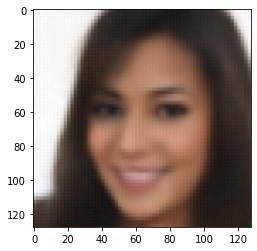

In [30]:
data = io.imread('AIML425/Project/og_img_1LL.png')
data = io.imread('AIML425/Project/final_1LL.png')

r, g, b = [c.T for c in data.T]
cr = pywt.dwt2(r, 'haar')
cg = pywt.dwt2(g, 'haar')
cb = pywt.dwt2(b, 'haar')
LLr, (LHr, HLr, HHr) = cr
LLg, (LHg, HLg, HHg) = cg
LLb, (LHb, HLb, HHb) = cb
rgbLL = np.dstack((LLr,LLg,LLb))
rgbLH = np.dstack((LHr,LHg,LHb))
rgbHL = np.dstack((HLr,HLg,HLb))
rgbHH = np.dstack((HHr,HHg,HHb))

dataLL = io.imread('AIML425/Project/og_img_1LL.png')
dataLH = io.imread('AIML425/Project/og_img_1LH.png')
dataHL = io.imread('AIML425/Project/og_img_0HL.png')
dataHH = io.imread('AIML425/Project/og_img_1HH.png')

dataLL = io.imread('AIML425/Project/final_1LL.png')
dataLH = io.imread('AIML425/Project/final_1LH.png')
dataHL = io.imread('AIML425/Project/final_0HL.png')
dataHH = io.imread('AIML425/Project/final_1HH.png')

minLL =  rgbLL.min().round(0).astype(int)
minLH =  rgbLH.min().round(0).astype(int)
minHL =  rgbHL.min().round(0).astype(int)
minHH =  rgbHH.min().round(0).astype(int)
maxLL =  rgbLL.max().round(0).astype(int)
maxLH =  rgbLH.max().round(0).astype(int)
maxHL =  rgbHL.max().round(0).astype(int)
maxHH =  rgbHH.max().round(0).astype(int)

LLr, LLg, LLb = [c.T for c in dataLL.T/255*(maxLL-minLL)+minLL]
LHr, LHg, LHb = [c.T for c in dataLH.T/255*(maxLH-minLH)+minLH]
HLr, HLg, HLb = [c.T for c in dataHL.T/255*(maxHL-minHL)+minHL]
HHr, HHg, HHb = [c.T for c in dataHH.T/255*(maxHH-minHH)+minHH]

cr = LLr, (LHr, HLr, HHr) 
cg = LLg, (LHg, HLg, HHg) 
cb = LLb, (LHb, HLb, HHb)

restr=pywt.idwt2(cr, 'haar')
restg=pywt.idwt2(cg, 'haar')
restb=pywt.idwt2(cb, 'haar')

rgb = np.dstack((restr.astype(int),restg.astype(int),restb.astype(int)))  # stacks 3 h x w arrays -> h x w x 3
io.imsave('Restored' + str(1)+'.jpg',rgb)

plt.imshow(rgb)